In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("success.")

success.


### Part 1 - Data Import & Initial Exploration

In [3]:
# Load datasets
survey_df = pd.read_csv(r"C:\Users\P319970\git_delivery\git__project1\data\raw\survey-results-public.csv")
schema_df = pd.read_csv(r"C:\Users\P319970\git_delivery\git__project1\data\raw\survey-results-schema.csv")

print("shape of survey data:", survey_df.shape)
print("shape of schema data:", schema_df.shape)

shape of survey data: (51392, 154)
shape of schema data: (154, 2)


In [8]:
# Display first rows of survey data
survey_df.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN


In [9]:
# Display first rows of schema data
display(schema_df.head(3))

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...


### Part 2 – Basic Information & Missing Values

In [14]:
# Basic structure of the dataset
print("Shape of the dataset:", survey_df.shape)  # (rows, columns)

# Data types and non-null counts
survey_df.info()

# Quick look at missing values
missing = survey_df.isnull().sum().sort_values(ascending=False)
print("\nTop 20 columns with missing values:")
print(missing.head(20))

Shape of the dataset: (51392, 154)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB

Top 20 columns with missing values:
ExCoder10Years          50475
ExCoderNotForMe         50471
ExCoderWillNotCode      50470
ExCoderBalance          50469
ExCoderReturn           50469
ExCoderBelonged         50464
ExCoderActive           50462
ExCoderSkills           50457
YearsCodedJobPast       50418
MobileDeveloperType     49839
ExpectedSalary          48826
TimeAfterBootcamp       48790
NonDeveloperType        46502
WebDeveloperType        40696
Salary                  38501
Overpaid                38005
HaveWorkedFramework     31163
HoursPerWeek            30792
Currency                29984
InfluenceConsultants    29847
dtype: int64


### Part 3 – Select Relevant Columns

In [17]:
# Define columns relevant for our research questions
relevant_cols = [
    "Country",
    "FormalEducation",
    "HaveWorkedLanguage",
    "JobSatisfaction",
    "Salary"
]

# Create a clean working copy for analysis
survey_clean_df = survey_df[relevant_cols].copy()

print("Shape of the reduced dataset:", survey_clean_df.shape)

# Preview first few rows
survey_clean_df.head()

Shape of the reduced dataset: (51392, 5)


,Country,FormalEducation,HaveWorkedLanguage,JobSatisfaction,Salary
0,United States,Secondary school,Swift,NaN,NaN
1,United Kingdom,Some college/university study without earning ...,JavaScript; Python; Ruby; SQL,NaN,NaN
2,United Kingdom,Bachelor's degree,Java; PHP; Python,9.0,113750.0
3,United States,Doctoral degree,Matlab; Python; R; SQL,3.0,NaN
4,Switzerland,Master's degree,NaN,8.0,NaN


### Part 4 – Clean & Prepare Data

In [22]:
# Handle missing values
survey_clean_df = survey_clean_df.dropna(subset=["Salary", "Country"])
survey_clean_df.reset_index(drop=True, inplace=True)

# Convert Salary to numeric
survey_clean_df["Salary"] = (
    survey_clean_df["Salary"]
    .astype(str)                            # ensure string type
    .replace("[^0-9.]", "", regex=True)     # remove non-numeric characters
    .replace("", np.nan)                    # empty strings → NaN
    .astype(float)                          # convert to float
)

# Drop rows with invalid salary values (0 or NaN)
survey_clean_df = survey_clean_df.dropna(subset=["Salary"])
survey_clean_df = survey_clean_df[survey_clean_df["Salary"] > 0]

# Display summary
print("After cleaning:")
print("Rows:", survey_clean_df.shape[0])
display(survey_clean_df["Salary"].describe())


After cleaning:
Rows: 12885


count     12885.000000
mean      56324.696464
std       39871.676322
min           0.014682
25%       26515.151515
50%       50000.000000
75%       80000.000000
max      197000.000000
Name: Salary, dtype: float64

### Part 5 – Exploratory Data Analysis (EDA)

EDA dataset shape: (11776, 5)


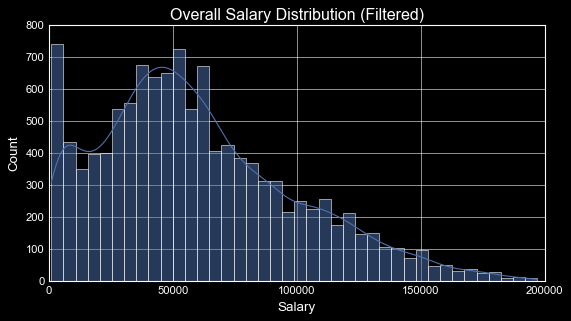

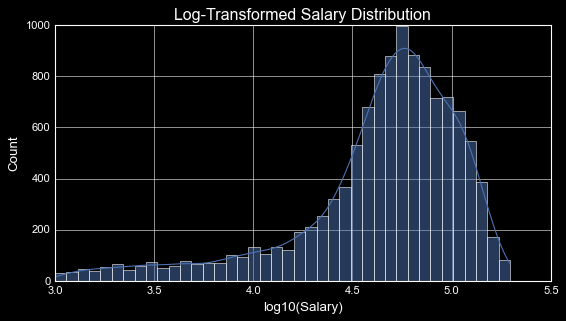


Top 10 countries by median salary:


Country
United States    94250.000000
Switzerland      90500.000000
Norway           71770.334928
Israel           70000.000000
Australia        67045.454545
Denmark          66666.666667
Ireland          62365.591398
New Zealand      60714.285714
Germany          53548.387097
Canada           53030.303030
Name: Salary, dtype: float64

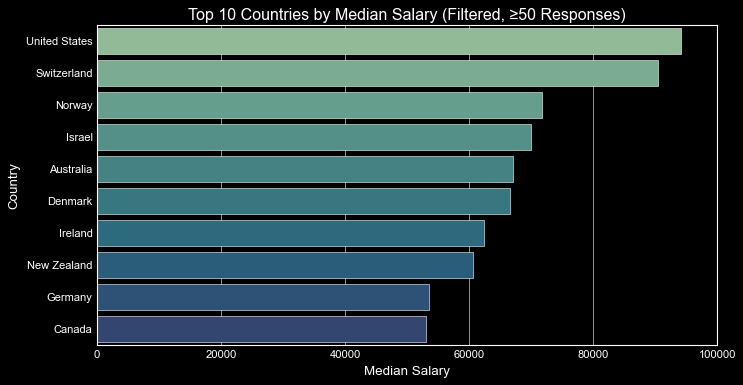

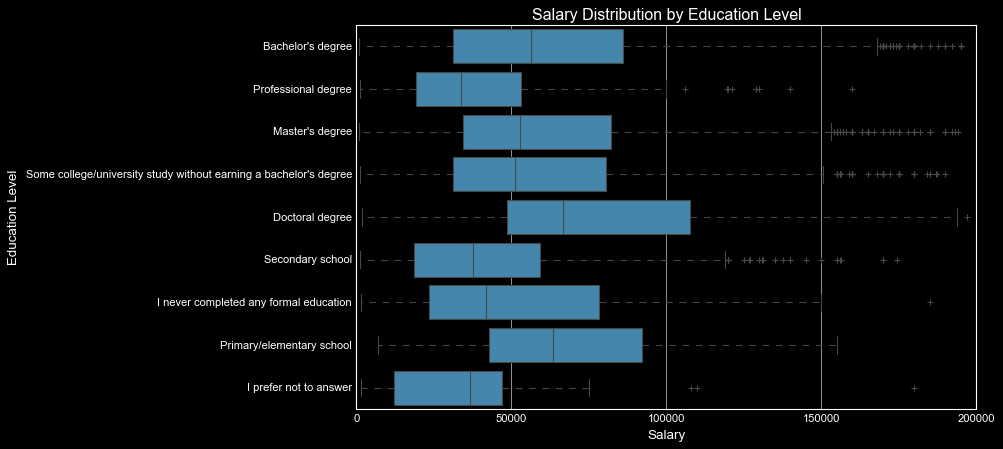

Filtered language dataset shape: (40542, 2)

Top 10 programming languages by median salary (filtered):


HaveWorkedLanguage
Clojure         74000.000000
Elixir          70606.060606
Go              68181.818182
Rust            67269.984917
F#              66329.185520
Perl            64516.129032
Groovy          63492.389963
Ruby            62903.225806
Scala           62500.000000
CoffeeScript    62250.000000
Name: Salary, dtype: float64

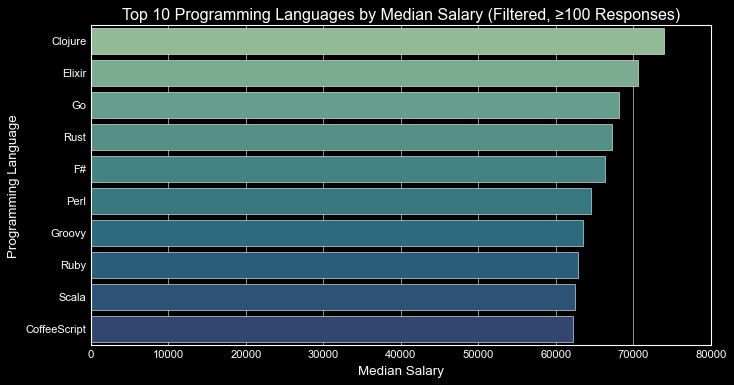

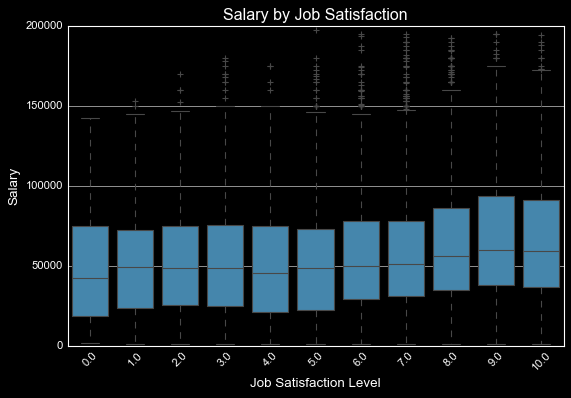

In [43]:
# plot style
plt.style.use("dark_background")
sns.set_palette("deep")

# Prepare filtered DataFrame for EDA, keep only countries with sufficient data and reasonable salary range
country_counts = survey_clean_df["Country"].value_counts()
valid_countries = country_counts[country_counts >= 50].index

eda_df = survey_clean_df[
    (survey_clean_df["Country"].isin(valid_countries)) &
    (survey_clean_df["Salary"].between(1000, 250000))
].copy()

print("EDA dataset shape:", eda_df.shape)



# Salary Distribution
plt.figure(figsize=(8, 4))
sns.histplot(eda_df["Salary"], bins=40, kde=True)
plt.xlabel("Salary")
plt.ylabel("Count")
plt.title("Overall Salary Distribution (Filtered)")
plt.show()



# log-transformed distribution
plt.figure(figsize=(8, 4))
sns.histplot(np.log10(eda_df["Salary"]), bins=40, kde=True)
plt.xlabel("log10(Salary)")
plt.ylabel("Count")
plt.title("Log-Transformed Salary Distribution")
plt.show()



# Salary by Country (Top10)
median_salary_by_country = (
    eda_df.groupby("Country")["Salary"]
    .median()
    .sort_values(ascending=False)
)

top10_countries = median_salary_by_country.head(10)
print("\nTop 10 countries by median salary:")
display(top10_countries)

# Build a small DF so we can use hue
country_plot_df = top10_countries.reset_index()
country_plot_df.columns = ["Country", "MedianSalary"]

plt.figure(figsize=(10, 5))
sns.barplot(
    data=country_plot_df,
    x="MedianSalary",
    y="Country",
    hue="Country",        
    legend=False,
    orient="h",
    palette="crest"
)
plt.xlabel("Median Salary")
plt.ylabel("Country")
plt.title("Top 10 Countries by Median Salary (Filtered, ≥50 Responses)")
plt.show()



# Salary by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=eda_df, x="Salary", y="FormalEducation", orient="h")
plt.xlabel("Salary")
plt.ylabel("Education Level")
plt.title("Salary Distribution by Education Level")
plt.show()



# Salary by Programming Language (Top10 filtered)
# Split multi-language responses and explode
lang_df = (
    eda_df[["HaveWorkedLanguage", "Salary"]]
    .dropna(subset=["HaveWorkedLanguage"])
    .copy()
)

lang_df["HaveWorkedLanguage"] = lang_df["HaveWorkedLanguage"].str.split(";")
lang_df = lang_df.explode("HaveWorkedLanguage")
lang_df["HaveWorkedLanguage"] = lang_df["HaveWorkedLanguage"].str.strip()

# Filter 1 - languages with more then 100 responses 
lang_counts = lang_df["HaveWorkedLanguage"].value_counts()
valid_langs = lang_counts[lang_counts >= 100].index

# Filter 2- only reasonable salary range
filtered_lang_df = lang_df[
    (lang_df["HaveWorkedLanguage"].isin(valid_langs)) &
    (lang_df["Salary"].between(1000, 250000))
].copy()

print("Filtered language dataset shape:", filtered_lang_df.shape)

# Compute median salary per language
median_salary_by_lang = (
    filtered_lang_df.groupby("HaveWorkedLanguage")["Salary"]
    .median()
    .sort_values(ascending=False)
)

# Top 10 languages by median salary
top10_langs = median_salary_by_lang.head(10)
print("\nTop 10 programming languages by median salary (filtered):")
display(top10_langs)

# Prepare dataframe for plotting
lang_plot_df = top10_langs.reset_index()
lang_plot_df.columns = ["Language", "MedianSalary"]

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(
    data=lang_plot_df,
    x="MedianSalary",
    y="Language",
    hue="Language",       
    legend=False,
    orient="h",
    palette="crest"
)
plt.xlabel("Median Salary")
plt.ylabel("Programming Language")
plt.title("Top 10 Programming Languages by Median Salary (Filtered, ≥100 Responses)")
plt.show()



# Salary vs Job Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(data=eda_df, x="JobSatisfaction", y="Salary")
plt.xticks(rotation=45)
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Salary")
plt.title("Salary by Job Satisfaction")
plt.show()


### Part 6 – Modeling

### Part 7 – Evaluation & Interpretation

### Part 8 – Communication & Export

### Part 9 – Conclusion

### Part 10 – Appendix